---

#  https://stackoverflow.com/questions/66501572

## is there an equivalent of plt.scatter in mplfinance? How to you graph data points in mplfinance?
---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import io

data = '''
Date Symbol Action Price
2020-03-01 AAPL Buy 80
2020-04-01 AAPL Sell 130
2020-05-01 AAPL Buy 90
2020-06-01 AAPL Sell 125
2020-07-01 AAPL Buy 125
2020-08-01 AAPL Sell 110
2020-09-01 AAPL Buy 95
2020-10-01 AAPL Sell 125
2020-11-01 AAPL Buy 125
2020-12-01 AAPL Sell 140
2021-01-01 AAPL Buy 115
2021-02-01 AAPL Sell 135
'''

df = pd.read_csv(io.StringIO(data), delim_whitespace=True)
df.shape
df

(12, 4)

,Date,Symbol,Action,Price
0,2020-03-01,AAPL,Buy,80
1,2020-04-01,AAPL,Sell,130
2,2020-05-01,AAPL,Buy,90
3,2020-06-01,AAPL,Sell,125
4,2020-07-01,AAPL,Buy,125
5,2020-08-01,AAPL,Sell,110
6,2020-09-01,AAPL,Buy,95
7,2020-10-01,AAPL,Sell,125
8,2020-11-01,AAPL,Buy,125
9,2020-12-01,AAPL,Sell,140


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
buy = df[df['Action'] == 'Buy']
buy2 = df[['Date']].merge(buy,how='outer')
sell = df[df['Action'] == 'Sell']
sell2 = df[['Date']].merge(sell,how='outer')

In [4]:
buy
buy2

,Date,Symbol,Action,Price
0,2020-03-01,AAPL,Buy,80
2,2020-05-01,AAPL,Buy,90
4,2020-07-01,AAPL,Buy,125
6,2020-09-01,AAPL,Buy,95
8,2020-11-01,AAPL,Buy,125
10,2021-01-01,AAPL,Buy,115


,Date,Symbol,Action,Price
0,2020-03-01,AAPL,Buy,80.0
1,2020-04-01,NaN,NaN,NaN
2,2020-05-01,AAPL,Buy,90.0
3,2020-06-01,NaN,NaN,NaN
4,2020-07-01,AAPL,Buy,125.0
5,2020-08-01,NaN,NaN,NaN
6,2020-09-01,AAPL,Buy,95.0
7,2020-10-01,NaN,NaN,NaN
8,2020-11-01,AAPL,Buy,125.0
9,2020-12-01,NaN,NaN,NaN


In [5]:
buy2
sell2

,Date,Symbol,Action,Price
0,2020-03-01,AAPL,Buy,80.0
1,2020-04-01,NaN,NaN,NaN
2,2020-05-01,AAPL,Buy,90.0
3,2020-06-01,NaN,NaN,NaN
4,2020-07-01,AAPL,Buy,125.0
5,2020-08-01,NaN,NaN,NaN
6,2020-09-01,AAPL,Buy,95.0
7,2020-10-01,NaN,NaN,NaN
8,2020-11-01,AAPL,Buy,125.0
9,2020-12-01,NaN,NaN,NaN


,Date,Symbol,Action,Price
0,2020-03-01,NaN,NaN,NaN
1,2020-04-01,AAPL,Sell,130.0
2,2020-05-01,NaN,NaN,NaN
3,2020-06-01,AAPL,Sell,125.0
4,2020-07-01,NaN,NaN,NaN
5,2020-08-01,AAPL,Sell,110.0
6,2020-09-01,NaN,NaN,NaN
7,2020-10-01,AAPL,Sell,125.0
8,2020-11-01,NaN,NaN,NaN
9,2020-12-01,AAPL,Sell,140.0


In [6]:
buy2.shape
sell2.shape
buy2

(12, 4)

(12, 4)

,Date,Symbol,Action,Price
0,2020-03-01,AAPL,Buy,80.0
1,2020-04-01,NaN,NaN,NaN
2,2020-05-01,AAPL,Buy,90.0
3,2020-06-01,NaN,NaN,NaN
4,2020-07-01,AAPL,Buy,125.0
5,2020-08-01,NaN,NaN,NaN
6,2020-09-01,AAPL,Buy,95.0
7,2020-10-01,NaN,NaN,NaN
8,2020-11-01,AAPL,Buy,125.0
9,2020-12-01,NaN,NaN,NaN


In [7]:
import mplfinance as mpf
import yfinance as yf
#data = yf.download("AAPL", interval='1mo', start="2020-03-01", end="2021-02-28")
data = yf.download("AAPL", interval='1mo', start="2020-03-01", end="2021-02-28")
data.dropna(how='any', inplace=True)
data.shape
data

[*********************100%***********************]  1 of 1 completed


(12, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-01,70.570000,76.000000,53.152500,63.572498,63.083504,6.280072e+09
2020-04-01,61.625000,73.632500,59.224998,73.449997,72.885025,3.266123e+09
2020-05-01,71.562500,81.059998,71.462502,79.485001,78.873604,2.806405e+09
2020-06-01,79.437500,93.095001,79.302498,91.199997,90.743469,3.243376e+09
2020-07-01,91.279999,106.415001,89.144997,106.260002,105.728088,3.020496e+09
2020-08-01,108.199997,131.000000,107.892502,129.039993,128.394058,4.070623e+09
2020-09-01,132.759995,137.979996,103.099998,115.809998,115.438042,3.885767e+09
2020-10-01,117.639999,125.389999,107.720001,108.860001,108.510361,2.895017e+09
2020-11-01,109.110001,121.989998,107.320000,119.050003,118.667633,2.123077e+09


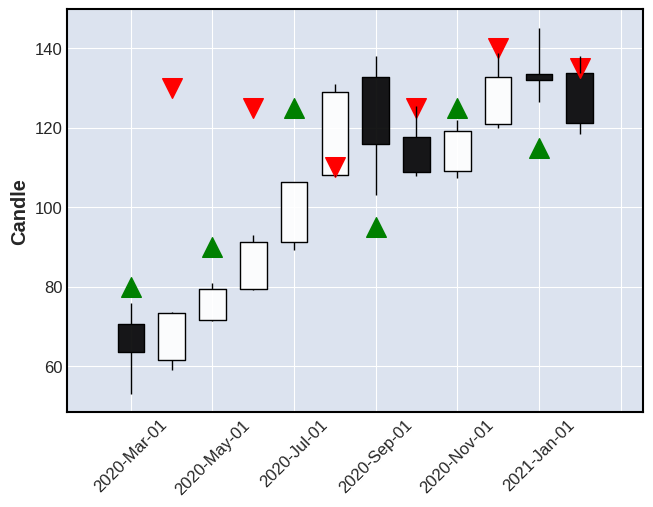

In [8]:
ap = [mpf.make_addplot(buy2['Price'], type='scatter', marker='^', markersize=200, color='g'),
      mpf.make_addplot(sell2['Price'], type='scatter', marker='v', markersize=200, color='r')
     ]
      
mpf.plot(data, type='candle', ylabel='Candle', addplot=ap, volume=False)